In [14]:
import os
name = "deeplabv3plus_mobilenet_multi_combined_80k"
work_dir = './work_dirs/' + name

checkpoint_file = os.path.join(work_dir, "latest.pth")
classes = ("Background", "Meat", "Nuts/seeds", "Eggs", "Beans/lentils/peas", "Fruit", "Grain", "Vegetables", "Dairy", "Sauce/Spread", "Soup/Drink")
palette = [[0, 0, 0], [255, 66, 79], [191, 122, 57], [255, 255, 0], 
           [255, 0, 204], [120, 79, 255], [211, 255, 117], [5, 245, 17], [255, 255, 255],[107, 7, 0], [97, 80, 5], [250, 87, 236]][0:len(classes)]

In [15]:
import time
import matplotlib
import matplotlib.pylab as plt
import numpy as np
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab

def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmseg.models import build_segmentor
from mmseg.apis import inference_segmentor, init_segmentor



config_fname = "./work_dirs/" + name+"/"+name +".py"
# build the model from a config file and a checkpoint file
model = init_segmentor(config_fname, checkpoint_file)
model.CLASSES = classes


/nobackup/hli5/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmcv/cnn/bricks/hsigmoid.py:31: UserWarning: In MMCV v1.4.4, we modified the default value of args to align with PyTorch official. Previous Implementation: Hsigmoid(x) = min(max((x + 1) / 2, 0), 1). Current Implementation: Hsigmoid(x) = min(max((x + 3) / 6, 0), 1).
  warnings.warn(
/nfs/nfs9/home/nobackup/hli5/FoodCV/mmsegmentation/mmseg/models/losses/combined_cross_entropy.py:211: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
/nfs/nfs9/home/nobackup/hli5/FoodCV/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_igno

load checkpoint from local path: ./work_dirs/deeplabv3plus_mobilenet_multi_combined_80k/latest.pth


In [16]:
def show_result_pyplot(model,
                       img,
                       result,
                       palette=None,
                       fig_size=(15, 10),
                       opacity=0.5,
                       title='',
                       block=True,
                       show_legend=False):
    """Visualize the segmentation results on the image.

    Args:
        model (nn.Module): The loaded segmentor.
        img (str or np.ndarray): Image filename or loaded image.
        result (list): The segmentation result.
        palette (list[list[int]]] | None): The palette of segmentation
            map. If None is given, random palette will be generated.
            Default: None
        fig_size (tuple): Figure size of the pyplot figure.
        opacity(float): Opacity of painted segmentation map.
            Default 0.5.
            Must be in (0, 1] range.
        title (str): The title of pyplot figure.
            Default is ''.
        block (bool): Whether to block the pyplot figure.
            Default is True.
    """
    if hasattr(model, 'module'):
        model = model.module
    img = model.show_result(
        img, result, palette=palette, show=False, opacity=opacity)
    plt.figure(figsize=fig_size)
    plt.axis("off")
    plt.imshow(mmcv.bgr2rgb(img))
    plt.tight_layout()
    plt.show(block=block)

/nfs/nfs9/home/nobackup/hli5/FoodCV/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


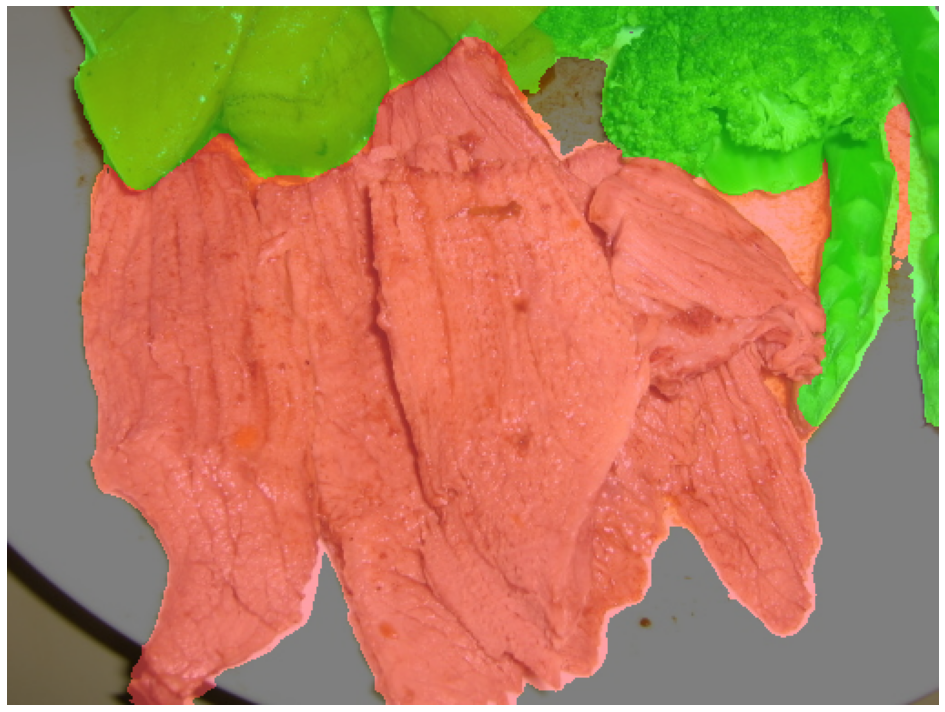

In [18]:
# test a single image and show the results
img = 'FoodSeg103/Images/img_dir/train/00000003.jpg'   #you can change this to any image you want!

result, _ = inference_segmentor(model, img)
show_result_pyplot(model, img, result, palette, show_legend=True)